In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import hiive.mdptoolbox 
import hiive.mdptoolbox.mdp
import hiive.mdptoolbox.example
import gym
import matplotlib.pyplot as plt
import time

In [9]:
def plot_simple_data(x_var, y_var, x_label, y_label, title, figure_size=(4,3)):
    plt.rcParams["figure.figsize"] = figure_size
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.plot(x_var, y_var, 'o-')
    plt.show()

def plot_data_legend(x_vars, x_label, all_y_vars, y_var_labels, y_label, title, y_bounds=None):
    colors = ['red','orange','black','green','blue','violet']
    plt.rcParams["figure.figsize"] = (4,3)

    i = 0
    for y_var in all_y_vars:
#         if i == 2: # don't plot when i = 1 for cv
#             x_vars = x_vars[1:]
        plt.plot(x_vars, y_var, 'o-', color=colors[i % 6], label=y_var_labels[i])
        i += 1
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    if y_bounds != None:
        plt.ylim(y_bounds)
    leg = plt.legend()
    plt.show()

In [10]:
def make_time_array(run_stats, variables):
    cumulative_sum = 0
    times = []
    output_dict = {v:[] for v in variables}
    output_dict["times"] = times
    for result in run_stats:
        times.append(result["Time"])
        for v in result:
            if v in variables:
                output_dict[v].append(result[v])
    return output_dict

In [11]:
P, R = hiive.mdptoolbox.example.forest(S=2000, p=0.01)

## Policy Iteration

[0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.96, 0.97, 0.98, 0.99]


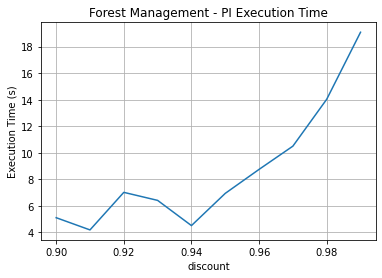

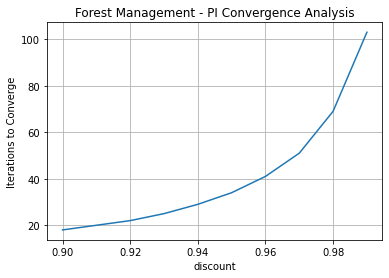

In [20]:
time_array=[0]*10
gamma_arr=[0]*10
iters=[0]*10

for i in range(0,10):
    st=time.time()
    PI = hiive.mdptoolbox.mdp.PolicyIteration(P, R, i/100+0.9)
    PI.run()
    end=time.time()
    gamma_arr[i]=(i/100+0.9)
    iters[i]=(PI.iter) 
    time_array[i]=(end-st)

print(gamma_arr)
plt.plot(gamma_arr, time_array)
plt.xlabel('discount')
plt.title('Forest Management - PI Execution Time')
plt.ylabel('Execution Time (s)')
plt.grid()
plt.show()

plt.plot(gamma_arr,iters)
plt.xlabel('discount')
plt.ylabel('Iterations to Converge')
plt.title('Forest Management - PI Convergence Analysis')
plt.grid()
plt.show()

In [36]:
st = time.time()
PI = hiive.mdptoolbox.mdp.PolicyIteration(P, R, 0.99)
PI.run()
end = time.time()
end-st
PI.policy

(0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [37]:
PI.iter

103

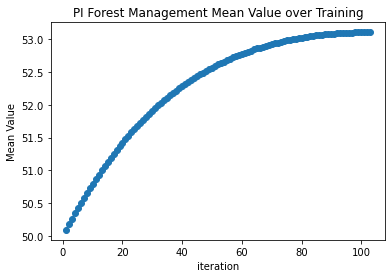

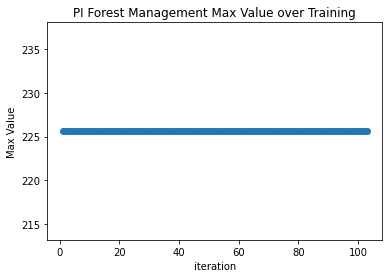

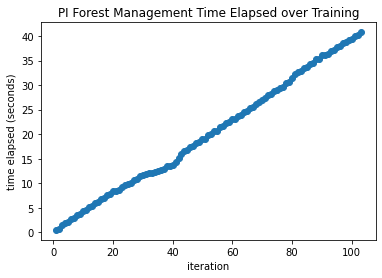

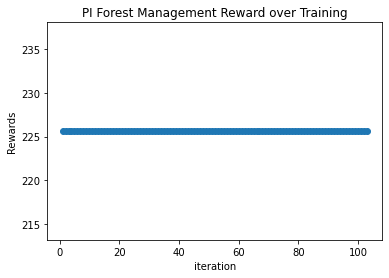

In [38]:
PI_results = make_time_array(PI.run_stats, ["Mean V", "Max V", "Iteration","Reward"])
num_iters = len(PI_results["Mean V"])
plot_simple_data(PI_results["Iteration"], PI_results["Mean V"], 
                 "iteration", "Mean Value", "PI Forest Management Mean Value over Training", figure_size=(6,4))
plot_simple_data(PI_results["Iteration"], PI_results["Max V"], 
                 "iteration", "Max Value", "PI Forest Management Max Value over Training", figure_size=(6,4))
plot_simple_data(PI_results["Iteration"], PI_results["times"], 
                 "iteration", "time elapsed (seconds)", "PI Forest Management Time Elapsed over Training", figure_size=(6,4))
plot_simple_data(PI_results["Iteration"], PI_results["Reward"], 
                 "iteration", "Rewards", "PI Forest Management Reward over Training", figure_size=(6,4))

## Value Iteration

[0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.96, 0.97, 0.98, 0.99]


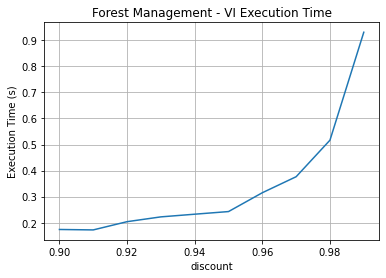

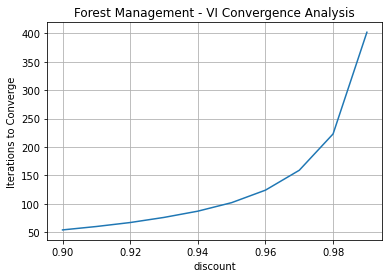

In [17]:
time_array=[0]*10
gamma_arr=[0]*10
iters=[0]*10

for i in range(0,10):
    st=time.time()
    PI = hiive.mdptoolbox.mdp.ValueIteration(P, R, i/100+0.9)
    PI.run()
    end=time.time()
    gamma_arr[i]=(i/100+0.9)
    iters[i]=(PI.iter) 
    time_array[i]=(end-st)

print(gamma_arr)
plt.plot(gamma_arr, time_array)
plt.xlabel('discount')
plt.title('Forest Management - VI Execution Time')
plt.ylabel('Execution Time (s)')
plt.grid()
plt.show()

plt.plot(gamma_arr,iters)
plt.xlabel('discount')
plt.ylabel('Iterations to Converge')
plt.title('Forest Management - VI Convergence Analysis')
plt.grid()
plt.show()

In [18]:
st = time.time()
VI = hiive.mdptoolbox.mdp.ValueIteration(P, R, 0.999)
VI.run()
end = time.time()
end-st
VI.policy

(0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [35]:
VI.iter

1168

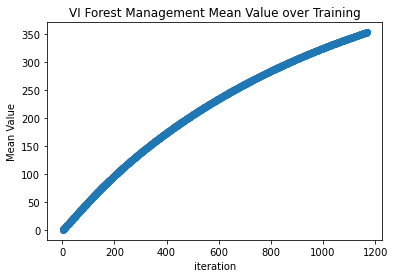

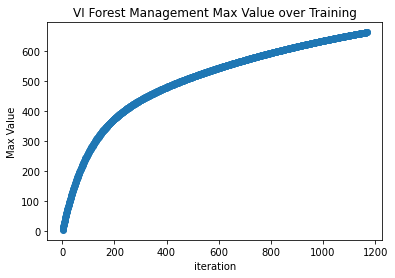

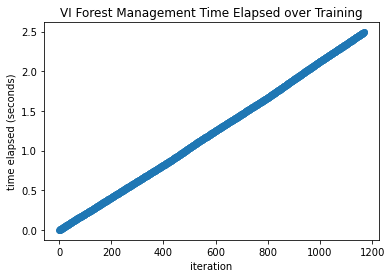

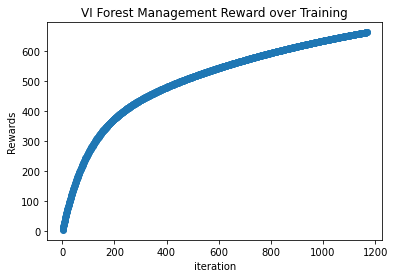

In [19]:
VI_results = make_time_array(VI.run_stats, ["Mean V", "Max V", "Iteration","Reward"])
num_iters = len(VI_results["Mean V"])
plot_simple_data(VI_results["Iteration"], VI_results["Mean V"], 
                 "iteration", "Mean Value", "VI Forest Management Mean Value over Training", figure_size=(6,4))
plot_simple_data(VI_results["Iteration"], VI_results["Max V"], 
                 "iteration", "Max Value", "VI Forest Management Max Value over Training", figure_size=(6,4))
plot_simple_data(VI_results["Iteration"], VI_results["times"], 
                 "iteration", "time elapsed (seconds)", "VI Forest Management Time Elapsed over Training", figure_size=(6,4))
plot_simple_data(VI_results["Iteration"], VI_results["Reward"], 
                 "iteration", "Rewards", "VI Forest Management Reward over Training", figure_size=(6,4))

## Q learning

In [26]:
st = time.time()
fm_q_mdp = hiive.mdptoolbox.mdp.QLearning(P, R, 0.999, epsilon=0.1,epsilon_decay=0.95, n_iter=10000000, alpha=0.95, skip_check=True)
fm_q_mdp.run()
end = time.time()
end-st
fm_q_mdp.policy

(0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


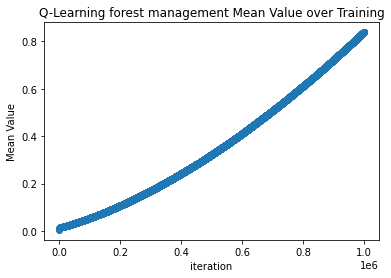

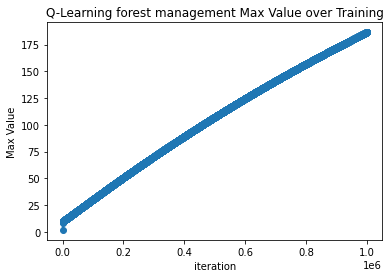

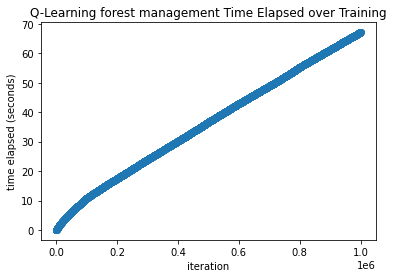

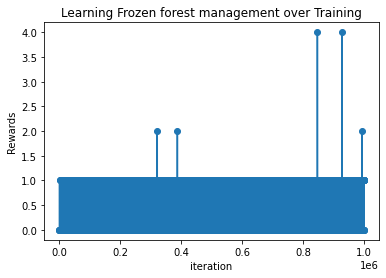

In [25]:
Q_results = make_time_array(fm_q_mdp.run_stats, ["Mean V", "Max V", "Iteration","Reward"])
num_iters = len(Q_results["Mean V"])
plot_simple_data(Q_results["Iteration"], Q_results["Mean V"], 
                 "iteration", "Mean Value", "Q-Learning forest management Mean Value over Training", figure_size=(6,4))
plot_simple_data(Q_results["Iteration"], Q_results["Max V"], 
                 "iteration", "Max Value", "Q-Learning forest management Max Value over Training", figure_size=(6,4))
plot_simple_data(Q_results["Iteration"], Q_results["times"], 
                 "iteration", "time elapsed (seconds)", "Q-Learning forest management Time Elapsed over Training", figure_size=(6,4))
plot_simple_data(Q_results["Iteration"], Q_results["Reward"], 
                 "iteration", "Rewards", "Learning Frozen forest management over Training", figure_size=(6,4))